## Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

В качестве датасета выбрали данные о прогнозирование рисков для здоровья беременных пациенток. https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data/code

In [190]:
import pandas as pd

In [191]:
data = pd.read_csv('Maternal_Health_Risk_Data_Set.csv')
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Для удобства перведем градусы фаренгейта в градусы цельсия и перепеишем данные в новый столбец, вставив его вместо столбца со старыми данными

In [192]:
def fahrenheit_to_celsius(f):
    return round((f - 32) * 5/9, 1)

# Применение функции к столбцу 'BodyTemp'
data['Body_Temp'] = data['BodyTemp'].apply(fahrenheit_to_celsius)

# Удаление исходного столбца 'BodyTemp'
data = data.drop('BodyTemp', axis=1)

columns_order = list(data.columns)
new_order = columns_order[:4] + ['Body_Temp'] + columns_order[4:-1]

# Создание нового датафрейма с новым порядком столбцов
data = data[new_order]

In [193]:
data

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,25,130,80,15.0,36.7,86,high risk
1,35,140,90,13.0,36.7,70,high risk
2,29,90,70,8.0,37.8,80,high risk
3,30,140,85,7.0,36.7,70,high risk
4,35,120,60,6.1,36.7,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.7,80,high risk
1010,55,120,90,18.0,36.7,60,high risk
1011,35,85,60,19.0,36.7,86,high risk
1012,43,120,90,18.0,36.7,70,high risk


Для работы очистим данные столбца RiskLevel, чтобы потом заполнить его автоматически, используя разметку на основе правил.

In [194]:
data['RiskLevel'] = ""

Сохраним полученный файл и дальше будем работать с ним

In [195]:
data.to_csv('Data_hw_9.csv', index=False)

## Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.


In [196]:
# Читаем полученный файл
df = pd.read_csv('Data_hw_9.csv')
df

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,25,130,80,15.0,36.7,86,NaN
1,35,140,90,13.0,36.7,70,NaN
2,29,90,70,8.0,37.8,80,NaN
3,30,140,85,7.0,36.7,70,NaN
4,35,120,60,6.1,36.7,76,NaN
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,36.7,80,NaN
1010,55,120,90,18.0,36.7,60,NaN
1011,35,85,60,19.0,36.7,86,NaN
1012,43,120,90,18.0,36.7,70,NaN


In [197]:
# Разделим файл на 2 подмножества для разметки автоматически 95% и вручную 5%
from sklearn.model_selection import train_test_split

subset_auto, subset_manual = train_test_split(df, test_size=0.05, random_state=42)

# Сохраним второе подмножество
subset_manual.to_csv('subset_manual.csv', index=False)

# Деление множества поровну
#split_index = len(df) // 2

# Берем первую половину данных для автоматической разметки на основе правил
#subset_auto = df.iloc[:split_index, :]

# Берем вторую половину данных для ручной разметки в 4 задаче и сохраним его
#subset_manual = df.iloc[split_index:, :]
#subset_manual.to_csv('subset_manual.csv', index=False)

In [198]:
# Определим под 1 подмножество правила
subset_auto

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
580,24,120,80,7.5,36.7,66,NaN
286,23,120,90,7.7,36.7,60,NaN
101,25,120,80,6.8,36.7,66,NaN
497,19,120,80,7.0,36.7,70,NaN
732,30,120,80,6.9,38.3,76,NaN
...,...,...,...,...,...,...,...
106,50,140,90,15.0,36.7,90,NaN
270,22,120,90,7.0,36.7,82,NaN
860,17,90,63,6.9,38.3,70,NaN
435,65,130,80,15.0,36.7,86,NaN


In [ ]:
# 1 способ - через функцию
# def mark_rules(row):
#     if row['Age'] >= 18 and row['Age'] <= 45 and row['SystolicBP'] >= 110 and row['SystolicBP'] <= 130 and row['DiastolicBP'] >= 70 and row['DiastolicBP'] <= 85 and row['BS'] >= 4.1 and row['BS'] <= 7.2 and row['Body_Temp'] >= 36.4 and row['Body_Temp'] <= 36.9 and row['HeartRate'] >= 60 and row['HeartRate'] <= 90:
#         return 'Low risk'
#     else:
#         return 'High risk'

# subset_auto['RiskLevel'] = subset_auto.apply(mark_rules, axis=1)
# subset_auto.head()

In [199]:
# 2 способ - через loc()
# Присвоение начальных меток
subset_auto['RiskLevel'] = 'низкий риск'

# Условия для высокого риска
subset_auto.loc[subset_auto['Age'] < 18, 'RiskLevel'] = 'высокий риск'
subset_auto.loc[(subset_auto['Age'] >= 18) & (subset_auto['Age'] <= 45) & ((subset_auto['SystolicBP'] > 140) | (subset_auto['DiastolicBP'] > 90) | (subset_auto['BS'] > 140) | (subset_auto['Body_Temp'] > 38) | (subset_auto['HeartRate'] > 100)), 'RiskLevel'] = 'высокий риск'

# Условия для среднего риска
subset_auto.loc[(subset_auto['Age'] >= 35) & (subset_auto['Age'] <= 50) & ((subset_auto['SystolicBP'] > 120) | (subset_auto['DiastolicBP'] > 80) | (subset_auto['BS'] > 120) | (subset_auto['Body_Temp'] > 37.5) | (subset_auto['HeartRate'] > 90)), 'RiskLevel'] = 'средний риск'

In [200]:
subset_auto.head(20)

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
580,24,120,80,7.5,36.7,66,низкий риск
286,23,120,90,7.7,36.7,60,низкий риск
101,25,120,80,6.8,36.7,66,низкий риск
497,19,120,80,7.0,36.7,70,низкий риск
732,30,120,80,6.9,38.3,76,высокий риск
468,25,140,100,6.8,36.7,80,высокий риск
705,21,100,50,6.8,36.7,60,низкий риск
30,20,100,90,7.1,36.7,88,низкий риск
365,22,120,90,7.8,36.7,82,низкий риск
884,32,120,90,6.8,36.7,70,низкий риск


In [201]:
subset_auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 580 to 102
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          963 non-null    int64  
 1   SystolicBP   963 non-null    int64  
 2   DiastolicBP  963 non-null    int64  
 3   BS           963 non-null    float64
 4   Body_Temp    963 non-null    float64
 5   HeartRate    963 non-null    int64  
 6   RiskLevel    963 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 60.2+ KB


In [202]:
subset_auto.to_csv('subset_auto.csv', index=False)

## Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

In [203]:
df_manually = pd.read_csv('../hw_9/subset_manual.csv', engine='python', encoding='utf-8', on_bad_lines='skip', encoding_errors='ignore')
df_manually.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,29,130,70,7.7,36.7,78,NaN
1,30,140,100,15.0,36.7,70,NaN
2,50,140,95,17.0,36.7,60,NaN
3,23,120,90,7.5,36.7,60,NaN
4,17,120,80,7.5,38.9,76,NaN


Далее установим библиотеку label-studio с помощью команды в терминале pip install label-studio и  терминале же запустим команду label-studio

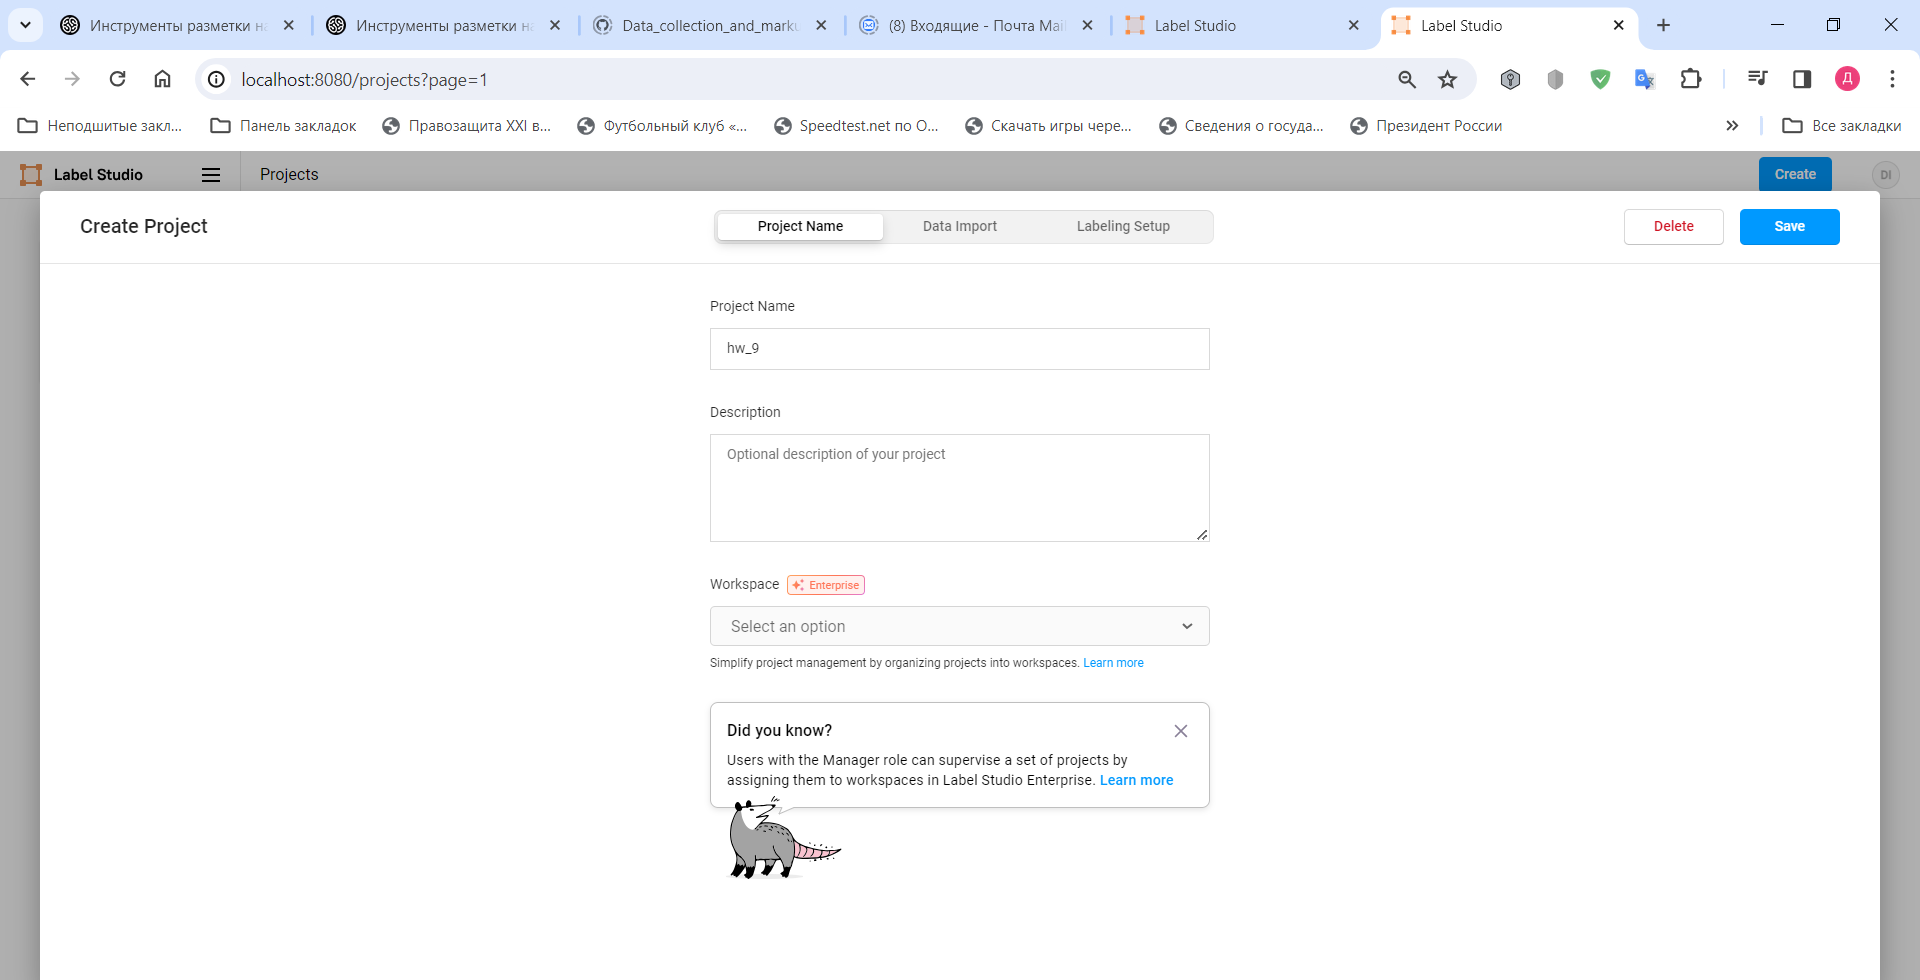

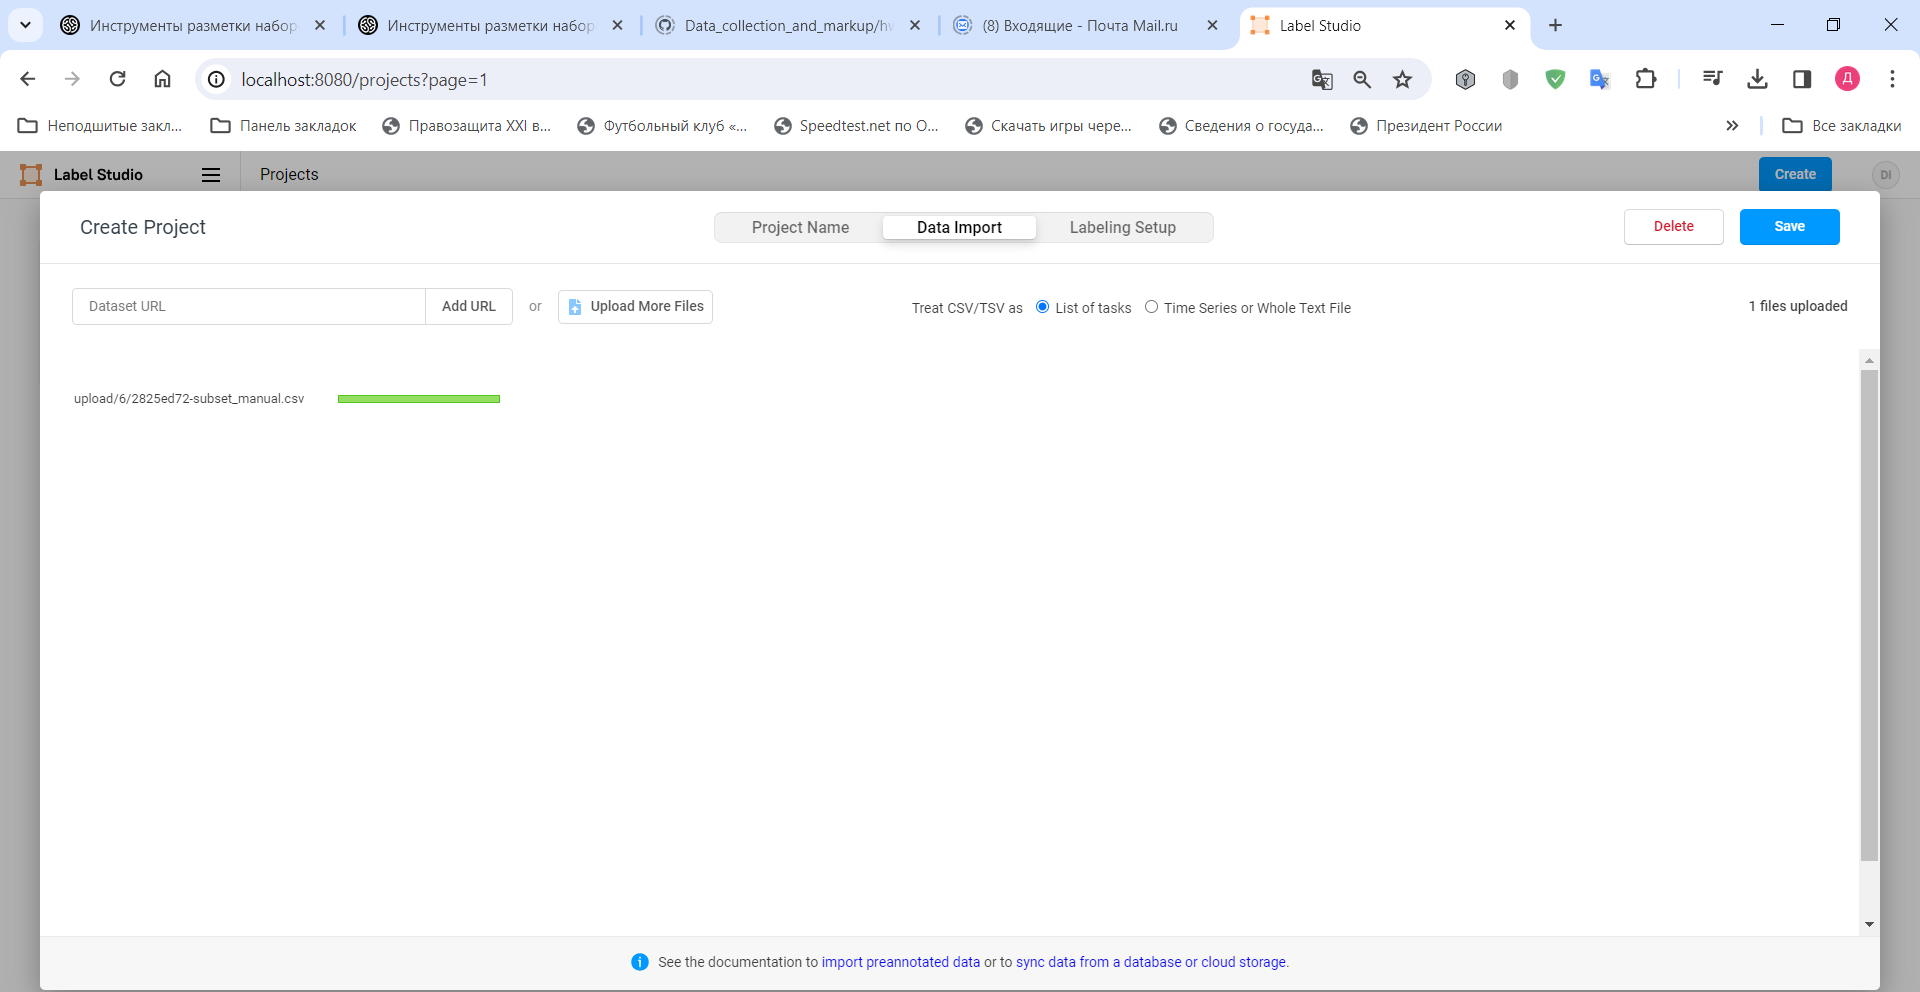

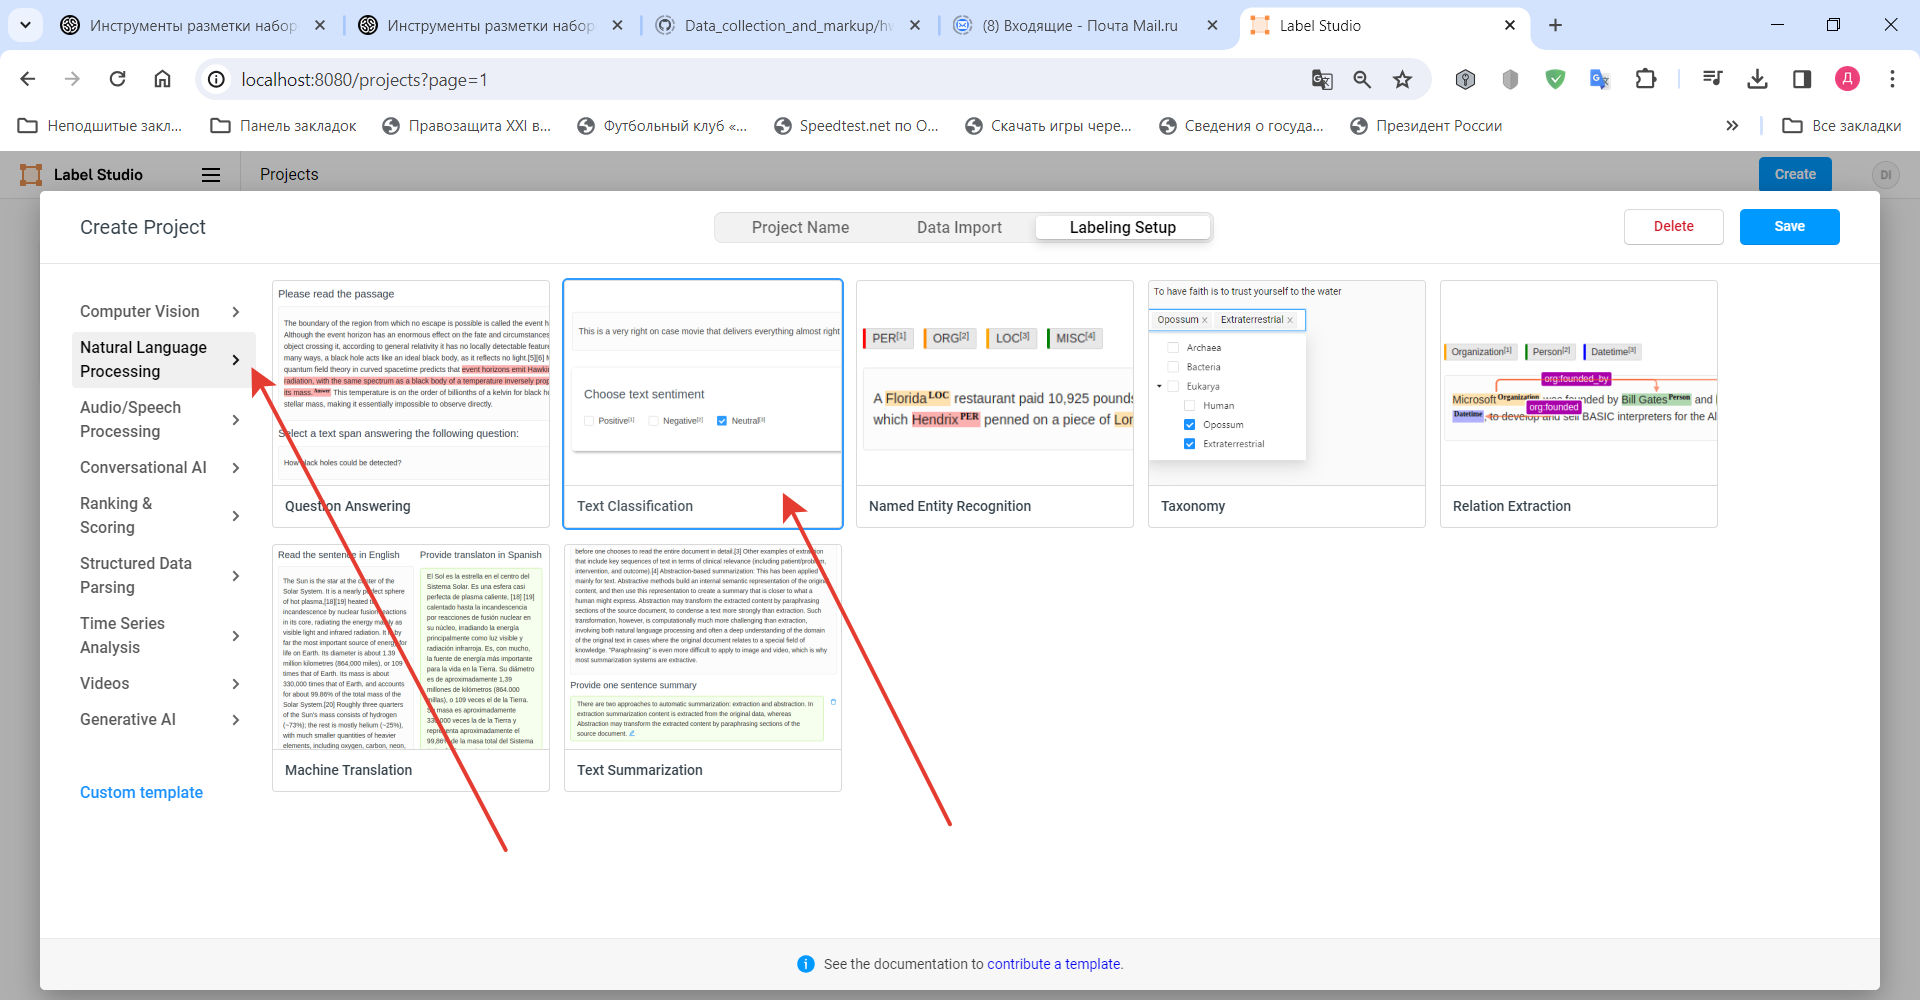

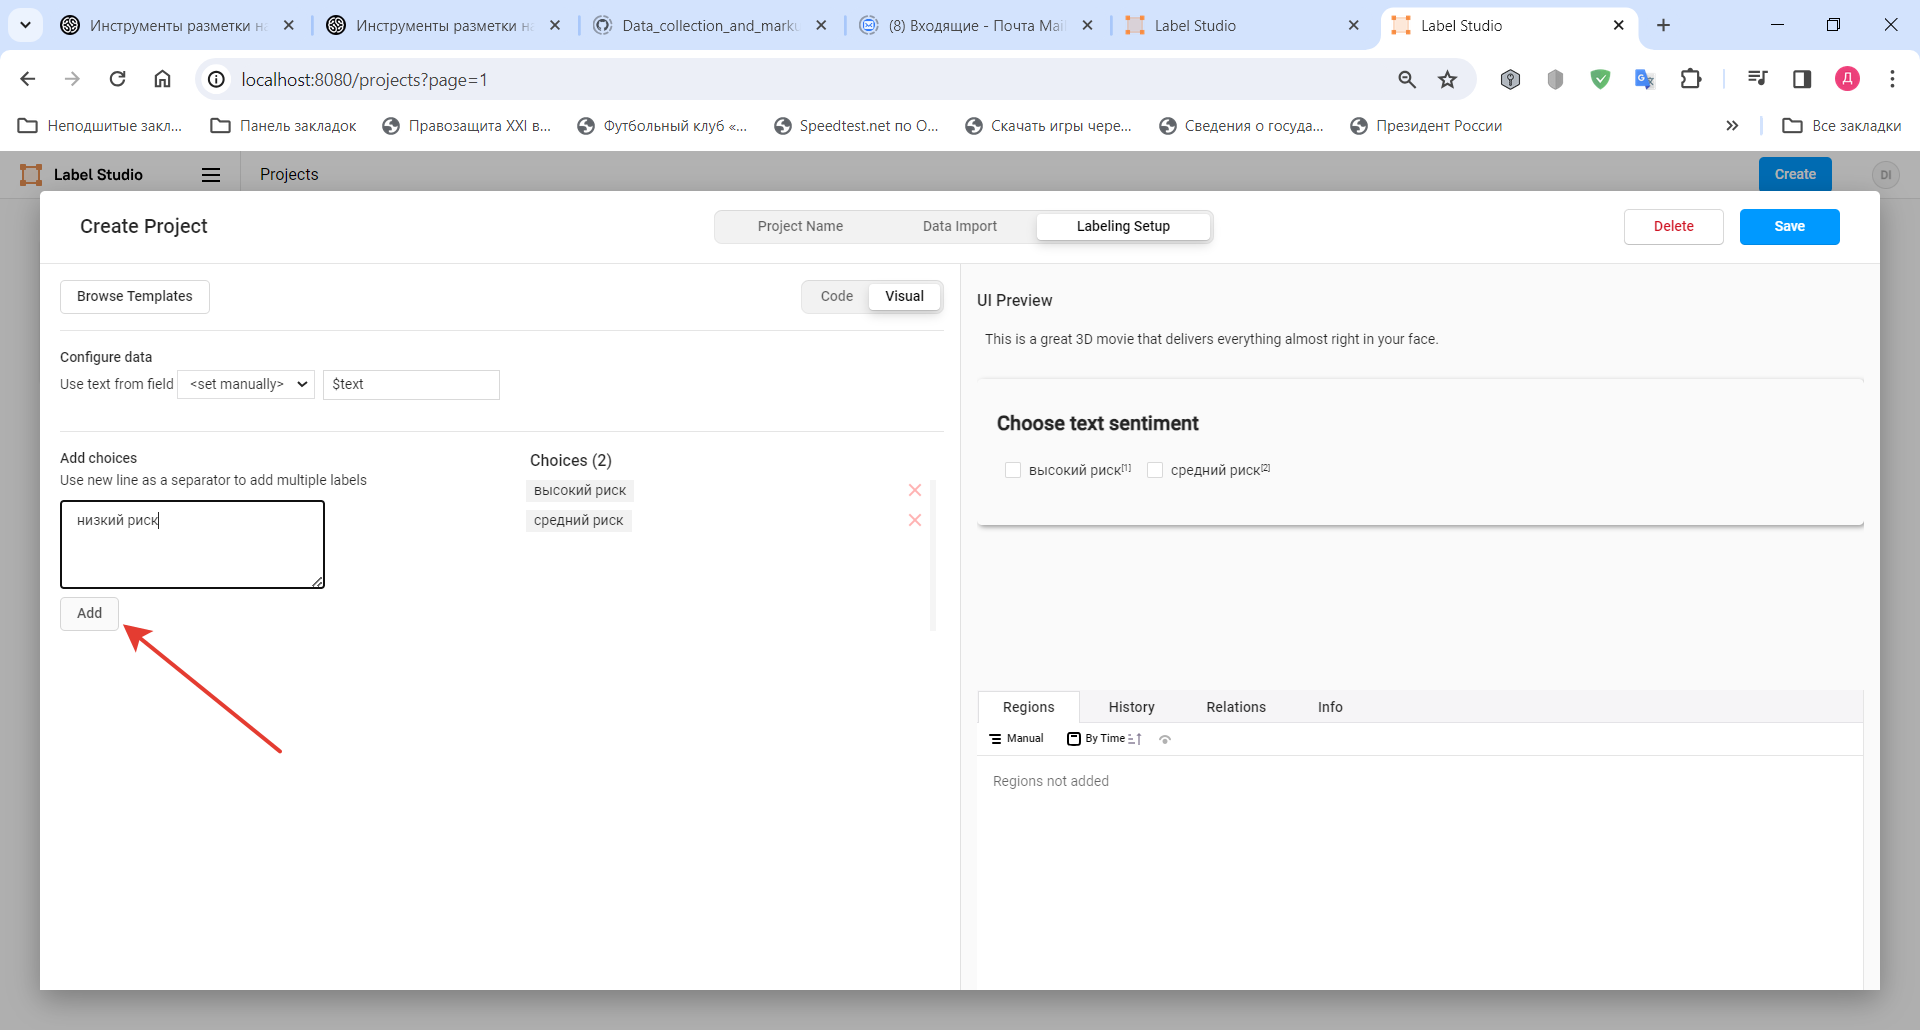

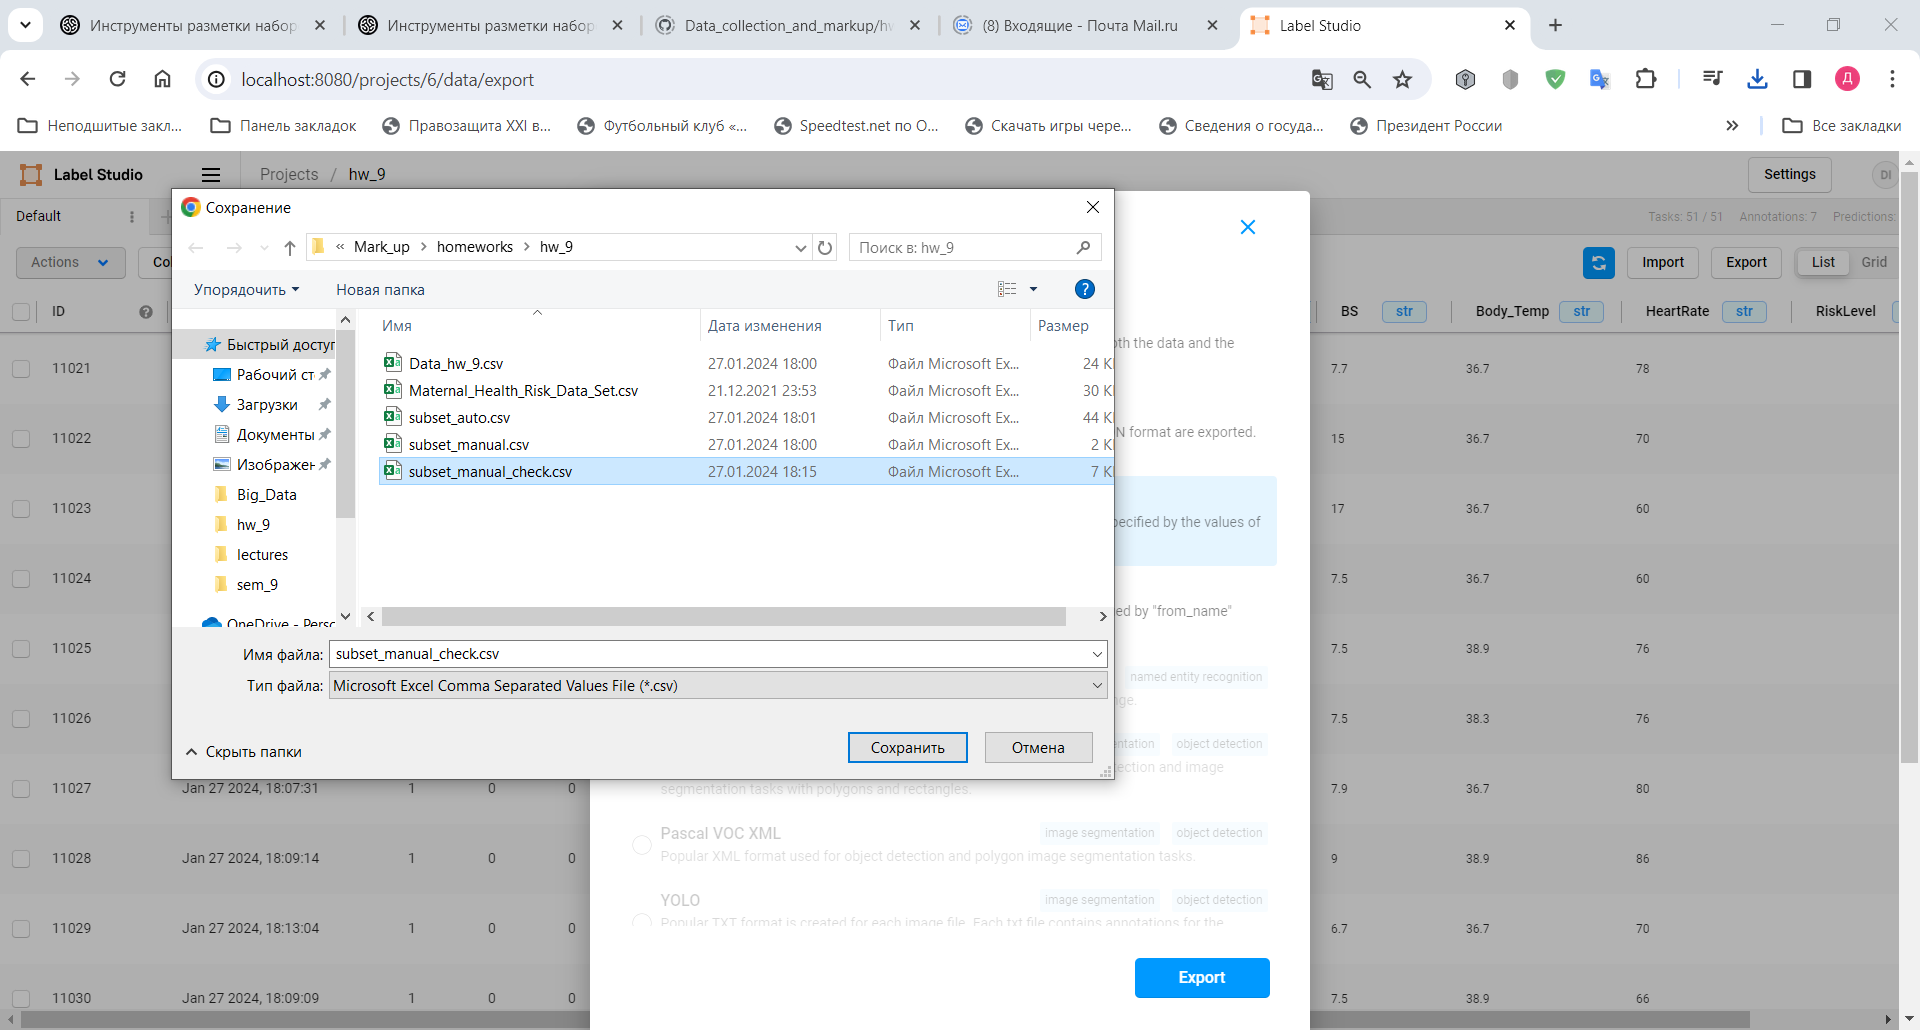

In [204]:
# Проверим
df_man = pd.read_csv('../hw_9/subset_manual_check.csv')
df_man.head()

,Age,BS,Body_Temp,DiastolicBP,HeartRate,RiskLevel,SystolicBP,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,29,7.7,36.7,70,78,NaN,130,19,1,2024-01-27T15:05:44.214718Z,11021,2.126,низкий риск,2024-01-27T15:05:44.214718Z
1,30,15.0,36.7,100,70,NaN,140,20,1,2024-01-27T15:06:33.244280Z,11022,2.014,средний риск,2024-01-27T15:06:33.244280Z
2,50,17.0,36.7,95,60,NaN,140,21,1,2024-01-27T15:06:43.565012Z,11023,2.410,средний риск,2024-01-27T15:06:43.565012Z
3,23,7.5,36.7,90,60,NaN,120,22,1,2024-01-27T15:06:55.176994Z,11024,2.974,низкий риск,2024-01-27T15:06:55.176994Z
4,17,7.5,38.9,80,76,NaN,120,23,1,2024-01-27T15:07:07.675697Z,11025,2.620,высокий риск,2024-01-27T15:07:07.675697Z


In [205]:
# Переопределим порядок столбцов для последующего объединения двух подмножеств
redefine = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'Body_Temp', 'HeartRate', 'RiskLevel', 'annotation_id', 'annotator', 'created_at', 'id','lead_time', 'sentiment', 'updated_at']
df_man = df_man[redefine]
df_man.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,29,130,70,7.7,36.7,78,NaN,19,1,2024-01-27T15:05:44.214718Z,11021,2.126,низкий риск,2024-01-27T15:05:44.214718Z
1,30,140,100,15.0,36.7,70,NaN,20,1,2024-01-27T15:06:33.244280Z,11022,2.014,средний риск,2024-01-27T15:06:33.244280Z
2,50,140,95,17.0,36.7,60,NaN,21,1,2024-01-27T15:06:43.565012Z,11023,2.410,средний риск,2024-01-27T15:06:43.565012Z
3,23,120,90,7.5,36.7,60,NaN,22,1,2024-01-27T15:06:55.176994Z,11024,2.974,низкий риск,2024-01-27T15:06:55.176994Z
4,17,120,80,7.5,38.9,76,NaN,23,1,2024-01-27T15:07:07.675697Z,11025,2.620,высокий риск,2024-01-27T15:07:07.675697Z


In [206]:
# сохраним новую версию файла
df_man.to_csv('subset_manual_check_1.csv', index=False)

## Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

In [207]:
subset1 = pd.read_csv('subset_auto.csv')
subset2 = pd.read_csv('subset_manual_check_1.csv')

In [208]:
subset2.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel,annotation_id,annotator,created_at,id,lead_time,sentiment,updated_at
0,29,130,70,7.7,36.7,78,NaN,19,1,2024-01-27T15:05:44.214718Z,11021,2.126,низкий риск,2024-01-27T15:05:44.214718Z
1,30,140,100,15.0,36.7,70,NaN,20,1,2024-01-27T15:06:33.244280Z,11022,2.014,средний риск,2024-01-27T15:06:33.244280Z
2,50,140,95,17.0,36.7,60,NaN,21,1,2024-01-27T15:06:43.565012Z,11023,2.410,средний риск,2024-01-27T15:06:43.565012Z
3,23,120,90,7.5,36.7,60,NaN,22,1,2024-01-27T15:06:55.176994Z,11024,2.974,низкий риск,2024-01-27T15:06:55.176994Z
4,17,120,80,7.5,38.9,76,NaN,23,1,2024-01-27T15:07:07.675697Z,11025,2.620,высокий риск,2024-01-27T15:07:07.675697Z


In [209]:
# Перенесем данные из столбца sentiment в столбец RiskLevel
subset2['RiskLevel'] = subset2['sentiment']

#Удалим ненужные нам столбцы
subset2.drop('annotation_id', axis=1, inplace=True)
subset2.drop('annotator', axis=1, inplace=True)
subset2.drop('created_at', axis=1, inplace=True)
subset2.drop('id', axis=1, inplace=True)
subset2.drop('lead_time', axis=1, inplace=True)
subset2.drop('sentiment', axis=1, inplace=True)
subset2.drop('updated_at', axis=1, inplace=True)


In [210]:
subset2.head()

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,29,130,70,7.7,36.7,78,низкий риск
1,30,140,100,15.0,36.7,70,средний риск
2,50,140,95,17.0,36.7,60,средний риск
3,23,120,90,7.5,36.7,60,низкий риск
4,17,120,80,7.5,38.9,76,высокий риск


In [211]:
# Объедините два подмножества в один набор данных
merged_dataset = pd.concat([subset1, subset2], ignore_index=True)

# Сохраните объединенный набор данных в файл, замените 'merged_dataset.csv' на желаемое имя файла
merged_dataset.to_csv('merged_dataset.csv', index=False)

## Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Пример модели

# чтение нашего объединенного файла
df_merge = pd.read_csv('merged_dataset.csv')
df_merge

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,24,120,80,7.50,36.7,66,низкий риск
1,23,120,90,7.70,36.7,60,низкий риск
2,25,120,80,6.80,36.7,66,низкий риск
3,19,120,80,7.00,36.7,70,низкий риск
4,30,120,80,6.90,38.3,76,высокий риск
...,...,...,...,...,...,...,...
1009,25,120,90,15.00,36.7,80,высокий риск
1010,29,130,70,7.80,36.7,78,низкий риск
1011,23,90,60,7.01,36.7,76,низкий риск
1012,32,120,90,7.70,36.7,70,низкий риск


In [214]:
# Замена строк на числа в датасете
df_merge['RiskLevel'] = df_merge['RiskLevel'].replace({'низкий риск': 0, 'средний риск': 1, 'высокий риск': 2})

In [215]:
df_merge

,Age,SystolicBP,DiastolicBP,BS,Body_Temp,HeartRate,RiskLevel
0,24,120,80,7.50,36.7,66,0
1,23,120,90,7.70,36.7,60,0
2,25,120,80,6.80,36.7,66,0
3,19,120,80,7.00,36.7,70,0
4,30,120,80,6.90,38.3,76,2
...,...,...,...,...,...,...,...
1009,25,120,90,15.00,36.7,80,2
1010,29,130,70,7.80,36.7,78,0
1011,23,90,60,7.01,36.7,76,0
1012,32,120,90,7.70,36.7,70,0


In [219]:
# Разделите данные на признаки (X) и целевую переменную (y)
X = df_merge.drop('Age', axis=1)  # Замените 'target_column_name' на имя вашей целевой переменной
y = df_merge['RiskLevel']

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Можно указать любой test_size и random_state

# Инициализируем модель машинного обучения (в данном случае пример с логистической регрессией)
model = LogisticRegression()  # Можно заменить на другую модель

# Обучим модель на обучающем наборе
model.fit(X_train, y_train)
# Оценим производительность модели на тестовом наборе
accuracy = model.score(X_test, y_test)
accuracy

c:\Users\dima4\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9655172413793104

## Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

* Для задачи классификации могут быть использованы метрики, такие как точность (accuracy), полнота (recall), точность (precision), F1-мера и кривая ROC-AUC. Для каждой метрики можно провести интерпретацию и анализ результатов.

In [220]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Предсказание меток классов на тестовом наборе
y_pred = model.predict(X_test)

In [221]:
# Оценка точности модели
accuracy_1 = accuracy_score(y_test, y_pred)
accuracy_1

0.9655172413793104

In [222]:
# Classification Report для полного анализа метрик precision, recall и f1-score
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       113\n           1       0.89      0.86      0.88        29\n           2       0.94      0.95      0.94        61\n\n    accuracy                           0.97       203\n   macro avg       0.94      0.94      0.94       203\nweighted avg       0.97      0.97      0.97       203\n'

In [223]:
# Матрица ошибок (Confusion Matrix) для визуализации количества правильных и неправильных прогнозов
confusion_matrix(y_test, y_pred)

array([[113,   0,   0],
       [  0,  25,   4],
       [  0,   3,  58]], dtype=int64)